# TELEPORTATION

000 -> topmost qubit is the rightmost

In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random
from qiskit.circuit.library import XGate, HGate
import matplotlib.pyplot as plt

from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city


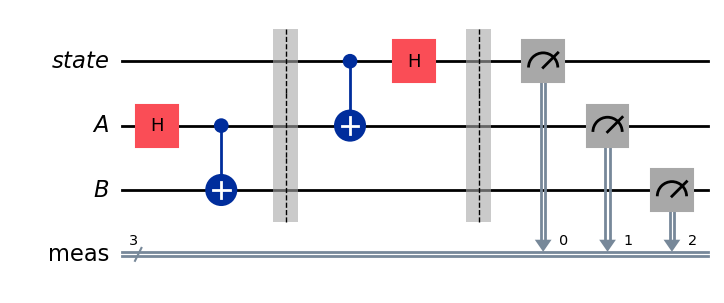

In [7]:
state = QuantumRegister(1, "state")
A = QuantumRegister(1, "A")
B = QuantumRegister(1, "B")
cr = ClassicalRegister(2, 'cr')
protocol = QuantumCircuit(state, A, B)



protocol.h(A)
protocol.cx(A, B)
protocol.barrier()

protocol.cx(state, A)
protocol.h(state)

protocol.measure_all()

protocol.draw("mpl")

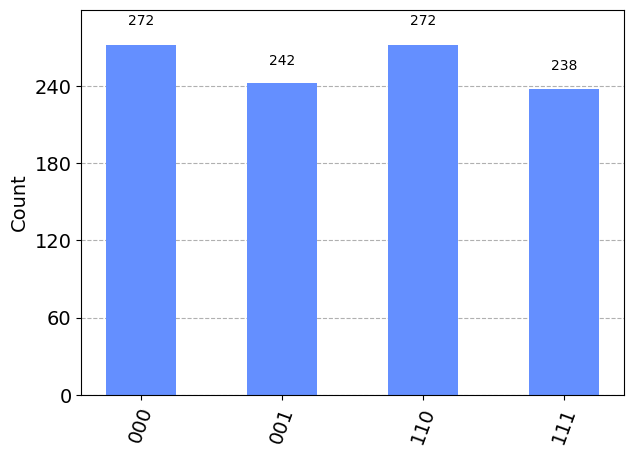

In [8]:

result = AerSimulator().run(protocol).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

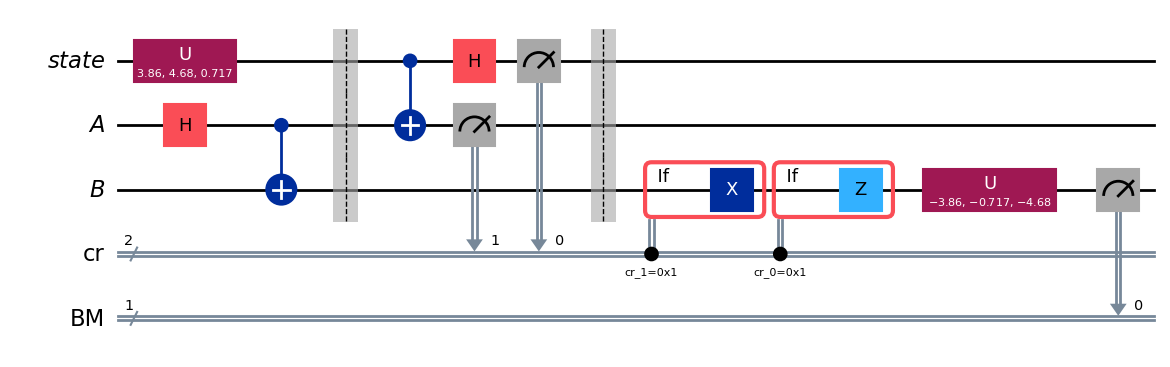

In [28]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

state = QuantumRegister(1, "state")
A = QuantumRegister(1, "A")
B = QuantumRegister(1, "B")
cr = ClassicalRegister(2, 'cr')
BM = ClassicalRegister(1, "BM")
protocol = QuantumCircuit(state, A, B, cr, BM)

protocol.append(random_gate, state)
protocol.h(A)
protocol.cx(A, B)
protocol.barrier()

protocol.cx(state, A)
protocol.h(state)
protocol.measure(state, cr[0])
protocol.measure(A, cr[1])
protocol.barrier()

with protocol.if_test((cr[1], 1)):
    protocol.x(B)
with protocol.if_test((cr[0], 1)):
    protocol.z(B)

protocol.append(random_gate.inverse(), B)
protocol.measure(B, BM)

protocol.draw("mpl")
 

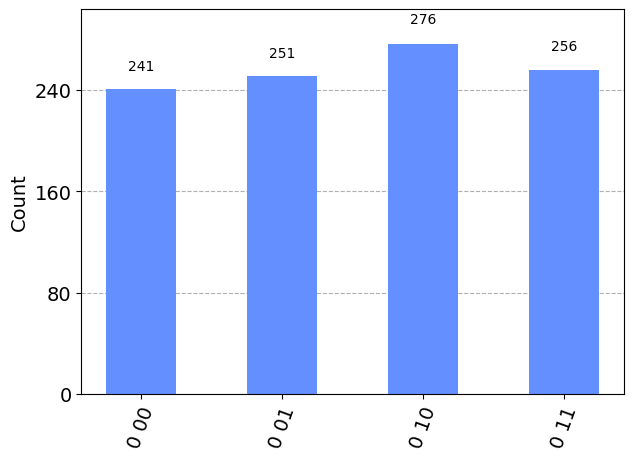

In [29]:
result = AerSimulator().run(protocol).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

array([[-0.08560246+0.j        , -0.42739899+0.90000129j],
       [ 0.64512307+0.75926836j, -0.08270458+0.02208471j]])

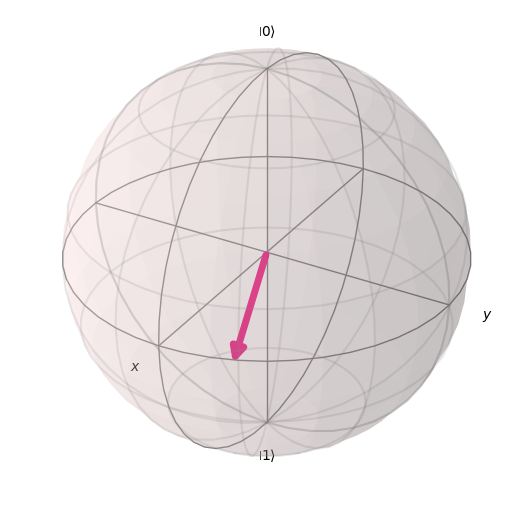

In [48]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

display(random_gate.to_matrix())

import numpy as np
from qiskit.visualization import plot_bloch_vector
  
plot_bloch_vector([random.random() * 2 * pi, random.random() * 2 * pi, random.random() * 2 * pi], coord_type='spherical')

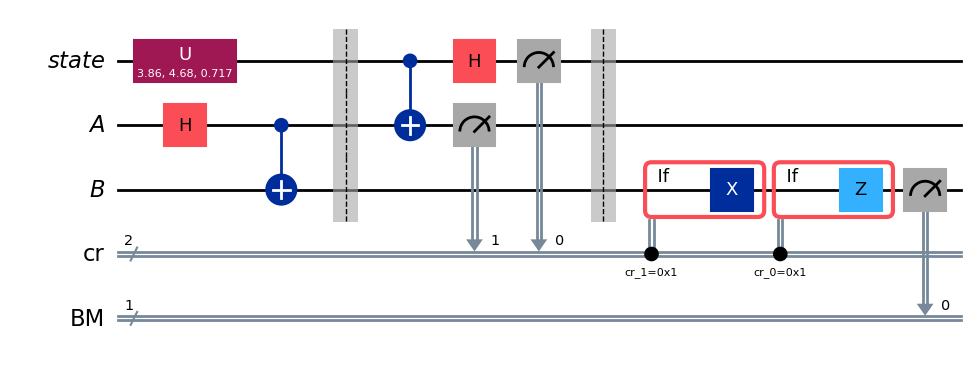

In [35]:

gate = random_gate #random_gate, XGate()

test_protocol = QuantumCircuit(state, A, B)

state = QuantumRegister(1, "state")
A = QuantumRegister(1, "A")
B = QuantumRegister(1, "B")
cr = ClassicalRegister(2, 'cr')
BM = ClassicalRegister(1, "BM")
protocol = QuantumCircuit(state, A, B, cr, BM)

protocol.append(gate, state)
protocol.h(A)
protocol.cx(A, B)
protocol.barrier()

protocol.cx(state, A)
protocol.h(state)
protocol.measure(state, cr[0])
protocol.measure(A, cr[1])
protocol.barrier()

with protocol.if_test((cr[1], 1)):
    protocol.x(B)
with protocol.if_test((cr[0], 1)):
    protocol.z(B)
    
#protocol.append(gate.inverse(), B)

protocol.measure(B, BM)

protocol.draw("mpl")

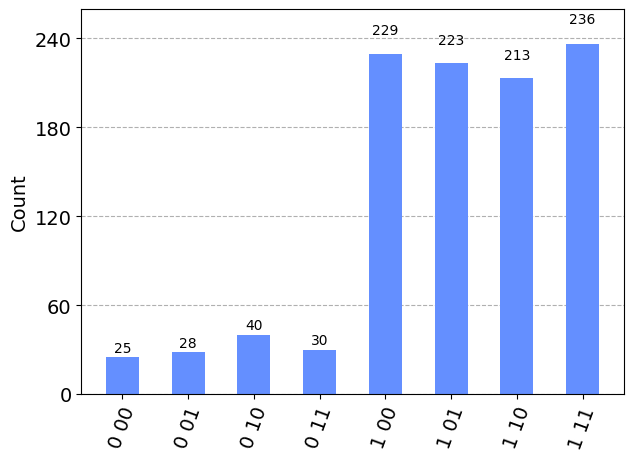

In [36]:
result = AerSimulator().run(protocol).result()
statistics = result.get_counts()
display(plot_histogram(statistics))
#statevector = result.get_statevector()

# filtered_statistics = marginal_distribution(statistics, [2])
# display(plot_histogram(filtered_statistics))

# # Get the state of qubit 3 by tracing out other qubits
# qubit_3_state = statevector.reshape((2, 2, 2, 2, 2)).sum(axis=(0, 2, 3, 4))

# # Print or visualize the state of qubit 3
# print("State of qubit 3:", qubit_3_state)
# plot_state_qsphere(qubit_3_state)  # Visualize the state on a Q-sphere

# ENTANGLEMENT

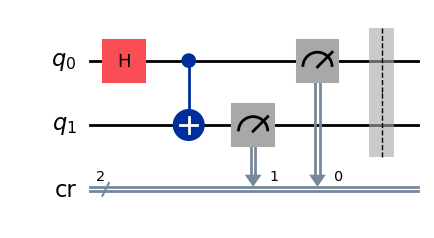

In [81]:
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2,'cr')
entangled_qc = QuantumCircuit(qr, cr)
entangled_qc.h(0)
entangled_qc.cx(0, 1)
#entangled_qc.x(0)

entangled_qc.measure(1, cr[1])
entangled_qc.measure(0, cr[0])
entangled_qc.barrier()

entangled_qc.draw('mpl')


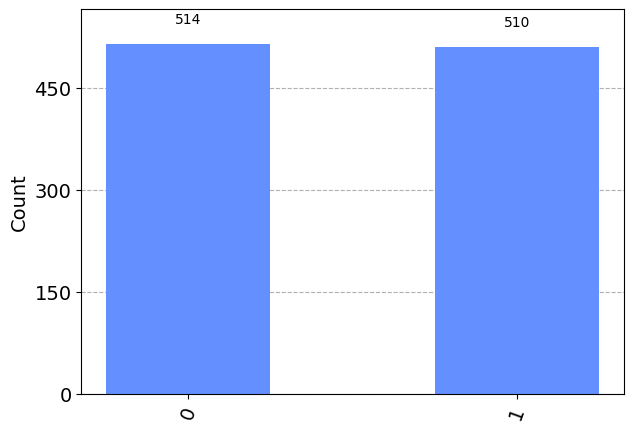

In [83]:
result = AerSimulator().run(entangled_qc).result()
statistics = result.get_counts()
# display(plot_histogram(statistics)

filtered_statistics = marginal_distribution(statistics, [1])
display(plot_histogram(filtered_statistics))



array([[-0.86378343+0.j        , -0.27257711-0.42376869j],
       [ 0.19565651-0.46432393j, -0.85091997+0.14851606j]])

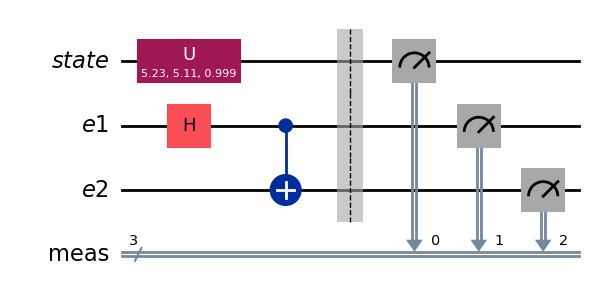

In [20]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)
xgate = UGate(
    theta = pi,
    phi= -pi/2,
    lam = pi/2
)

# random_gate = xgate

display(random_gate.to_matrix())
state = QuantumRegister(1, "state")
e1 = QuantumRegister(1, "e1")
e2 = QuantumRegister(1, "e2")

qcc = QuantumCircuit(state, e1, e2)
qcc.append(random_gate, state)
qcc.h(e1)
qcc.cx(e1,e2)
qcc.measure_all()
qcc.draw('mpl')

In [21]:
import numpy as np
random_gate = np.array(random_gate)
zero_state = np.array([1, 0])
res = random_gate.dot(zero_state)
test_shots = 1000
# np.linalg.norm(res)
# res = res**2
zero_prob = np.square(np.abs(res[0]))
one_prob = np.square(np.abs(res[1]))
total_prob = zero_prob+one_prob
print("Zero:", zero_prob, "one:", one_prob, "total:", total_prob)
print("Zero:", zero_prob*test_shots, "one:", one_prob*test_shots, "total:", total_prob*test_shots)

Zero: 0.7461218185473918 one: 0.2538781814526081 total: 0.9999999999999999
Zero: 746.1218185473917 one: 253.8781814526081 total: 999.9999999999999


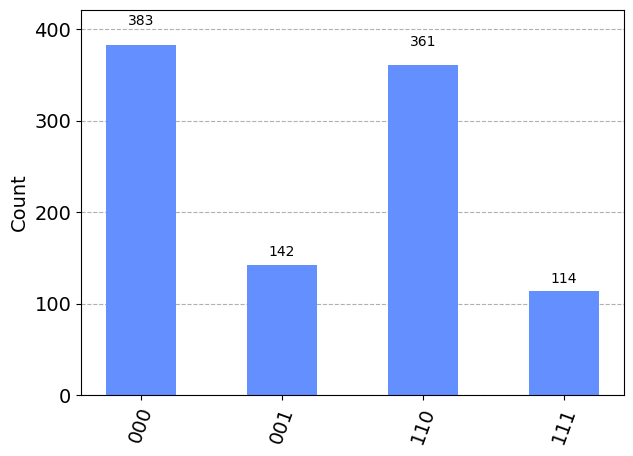

{'000': 383, '001': 142, '110': 361, '111': 114}


In [22]:
result_qcc = AerSimulator(enable_truncation=False,shots=test_shots).run(qcc).result()
statistics_qcc = result_qcc.get_counts(qcc)
display(plot_histogram(statistics_qcc))
sorted_statistics_qcc = dict(sorted(statistics_qcc.items(), key=lambda x: x[0]))
print(sorted_statistics_qcc)